In [1]:
import os.path as osp
import numpy as np
import numpy.linalg as npla
np.set_printoptions(6, suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    'font.size': 7,
})

import utils

def load_pred_poses(filename):
    data = np.loadtxt(filename)
    poses = []
    for v in data:
        T_ms = np.eye(4)
        T_ms[:3, :] = v.reshape(3, 4)
        poses.append(T_ms)
    return np.array(poses)

def load_gt_poses(filename):
    data = np.loadtxt(filename)
    poses = []
    for v in data:
        T_ms = np.eye(4)
        T_ms[:3, :] = v.reshape(3, 4)
        poses.append(T_ms)
    return np.array(poses)


def plot_pred_poses(ax, filename, gt_poses, label, color):
    pred_poses = load_pred_poses(filename)
    T_gt_pred = utils.align_path(gt_poses[::100], pred_poses[::100])
    # T_gt_pred = gt_poses[0] @ npla.inv(pred_poses[0])
    pred_poses = T_gt_pred @ pred_poses
    ax.plot(pred_poses[:, 0, 3], pred_poses[:, 1, 3], label=label, linewidth=1.0, color=color)
    max_x = np.max(pred_poses[:, 0, 3])
    min_x = np.min(pred_poses[:, 0, 3])
    max_y = np.max(pred_poses[:, 1, 3])
    min_y = np.min(pred_poses[:, 1, 3])
    mid_x = (max_x + min_x) / 2
    mid_y = (max_y + min_y) / 2
    range_x = max_x - min_x
    range_y = max_y - min_y
    longer = max(range_x, range_y)
    longer *= 1.1

    left = ((mid_x - longer / 2) // 400) * 400
    right = ((mid_x + longer / 2) // 400 + 1) * 400
    top = ((mid_y + longer / 2) // 400 + 1) * 400
    bottom = ((mid_y - longer / 2) // 400) * 400
    ax.xaxis.set_ticks(np.arange(left, right, 400))
    ax.yaxis.set_ticks(np.arange(bottom, top, 400))

    ax.set_xlim(mid_x - longer / 2, mid_x + longer / 2)
    ax.set_ylim(mid_y - longer / 2, mid_y + longer / 2)


gt_path = '/home/yuchen/ASRL/data/kitti_360'
pred_path = '/home/yuchen/ASRL/steam_icp/results/kitti_360/'

In [2]:
### compute kitti metric
sequences = ['00', '02', '03', '04', '05', '06', '07', '09', '10']
methods = ["elastic_icp", "steam_icp"]
load_gt_fn = lambda sequence: load_gt_poses(osp.join(gt_path, sequence, sequence + '.txt'))
load_pred_fn = lambda sequence, pred_file: load_pred_poses(osp.join(pred_path, pred_file, sequence + '_poses.txt'))
utils.print_results(sequences, methods, load_gt_fn, load_pred_fn)


elastic_icp
  00   02   03   04   05   06   07   09   10 
steam_icp
  00   02   03   04   05   06   07   09   10 
kitti metric t_err_2d
elastic_icp  & 0.38 & 0.32 & 0.36 & 0.50 & 0.29 & 0.38 & 0.38 & 0.44 & 0.56  & 0.39
steam_icp  & 0.39 & 0.33 & 0.44 & 0.51 & 0.29 & 0.38 & 0.51 & 0.30 & 0.59  & 0.38

kitti metric t_err_3d
elastic_icp  & 0.41 & 0.38 & 0.41 & 0.68 & 0.41 & 0.42 & 0.48 & 0.50 & 0.70  & 0.47
steam_icp  & 0.41 & 0.38 & 0.48 & 0.69 & 0.40 & 0.43 & 0.60 & 0.35 & 0.73  & 0.45

kitti metric r_err_2d
elastic_icp  & 0.0012 & 0.0011 & 0.0008 & 0.0012 & 0.0009 & 0.0010 & 0.0008 & 0.0010 & 0.0013  & 0.0011
steam_icp  & 0.0012 & 0.0011 & 0.0010 & 0.0013 & 0.0009 & 0.0010 & 0.0012 & 0.0010 & 0.0015  & 0.0011

kitti metric r_err_3d
elastic_icp  & 0.0015 & 0.0017 & 0.0012 & 0.0025 & 0.0021 & 0.0017 & 0.0014 & 0.0017 & 0.0021  & 0.0018
steam_icp  & 0.0015 & 0.0017 & 0.0013 & 0.0024 & 0.0021 & 0.0016 & 0.0016 & 0.0016 & 0.0022  & 0.0018

frame-to-frame metric t_err_2d
elastic_icp  & 0.0

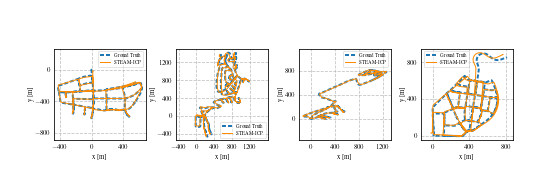

In [3]:
### plot path in 2d
sequences = ['00', '02', '04', '09']

fig, axs = plt.subplots(1, len(sequences), figsize=(7.5, 2.5))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.0, top=0.95, wspace=0.33, hspace=0.33)

for i, sequence in enumerate(sequences):
  ax = axs[i]

  gt_poses = load_gt_poses(osp.join(gt_path, sequence, sequence+'.txt'))
  ax.plot(gt_poses[:, 0, 3], gt_poses[:, 1, 3], "--", label='Ground Truth', linewidth=2.0, dashes=(2, 1))

  pred_file = 'steam_icp'
  plot_pred_poses(ax, osp.join(pred_path, pred_file, sequence+'_poses.txt'), gt_poses, "STEAM-ICP", color='darkorange')

  ax.set_xlabel('x [m]')
  ax.set_ylabel('y [m]', labelpad=1)
  ax.grid(which='both', linestyle='--', alpha=0.75)
  ax.set_aspect('equal', 'box')
  ax.legend(framealpha=0.5, fontsize=5)
  ax.tick_params(axis=u'both', which=u'both',length=0)

# plt.savefig('/home/yuchen/ASRL/notes/2023-icra-wu/figs/kitti_qualitative.pdf', format="pdf", bbox_inches="tight")
plt.show()